In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [ ]:
batch_size = 138
num_classes =18
epochs = 2

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


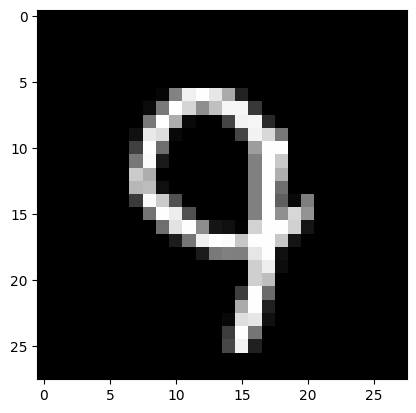

In [ ]:
print('label:', y_test[999:1000])
plt.imshow(x_test[999:1000].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 18)                594       
                                                                 
Total params: 27826 (108.70 KB)
Trainable params: 27826 (108.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Shape of First Layer
Visualization of First layer


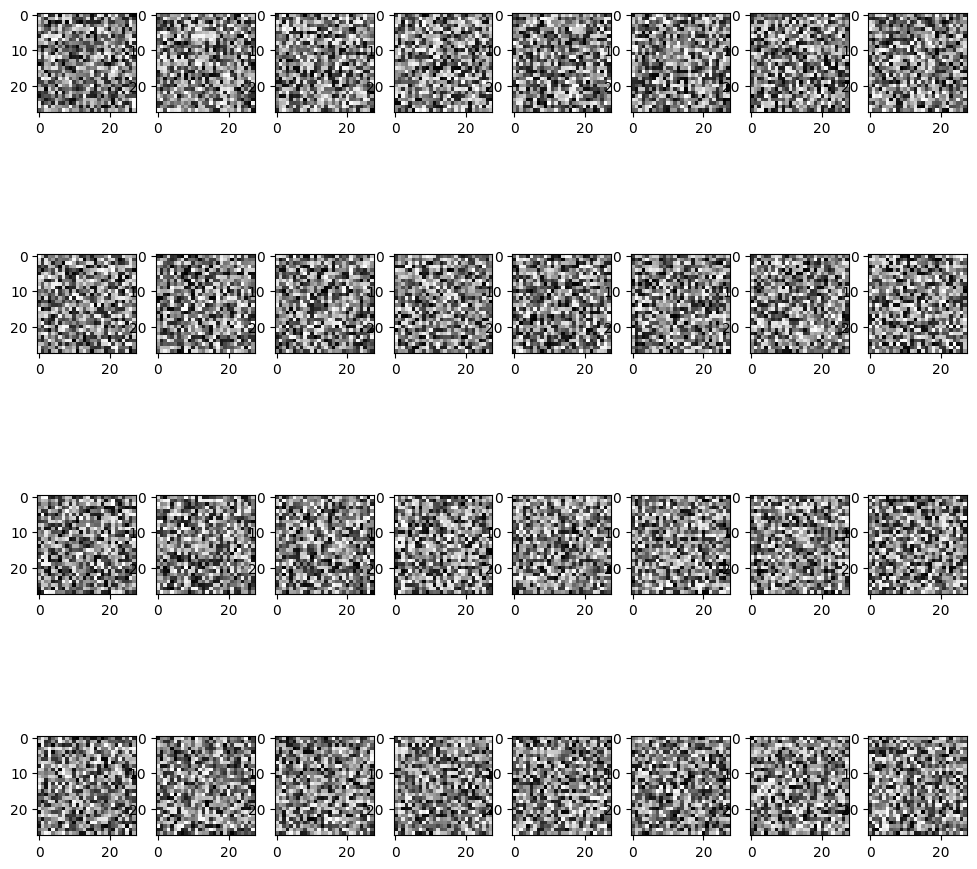

In [ ]:
w = []
for layer in model.layers:
  weights = layer.get_weights()
  w.append(weights)
layer1 = np.array(w[0][0])
print('Shape of First Layer')
print('Visualization of First layer')
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
model.compile(loss= 'categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


Epoch 1/2
435/435 [==============================] - 3s 5ms/step - loss: 1.9482 - accuracy: 0.3841
Epoch 2/2
435/435 [==============================] - 2s 4ms/step - loss: 0.9027 - accuracy: 0.7717


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test Accuracy: ', score[1])

Test loss:  0.6083655953407288
Test Accuracy:  0.8497999906539917


Shape of First Layer
Visualization of First layer


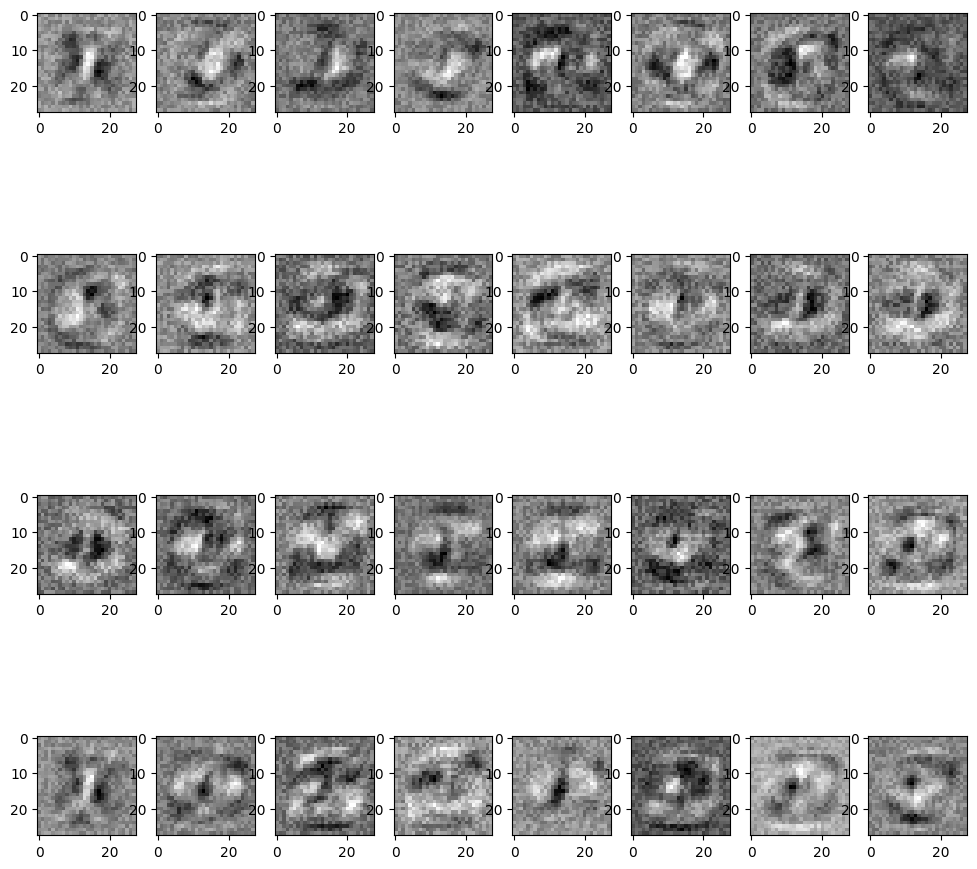

In [ ]:
w = []
for layer in model.layers:
  weights = layer.get_weights()
  w.append(weights)
layer1 = np.array(w[0][0])
print('Shape of First Layer')
print('Visualization of First layer')
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
prediction = model.predict(x_test[999:1000])
prediction = prediction[0]
print('prediction : ', prediction)
print('Thresholded output', (prediction>0.5)*1)

NameError: name 'model' is not defined

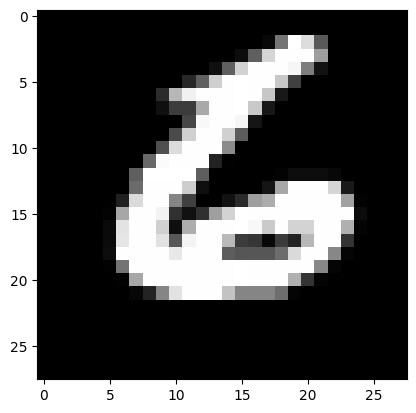

In [ ]:
plt.imshow(x_test[999-1000].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
from google.colab import files
files.upload()

Saving IMG-20240116-WA0004.jpg to IMG-20240116-WA0004.jpg


{'IMG-20240116-WA0004.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x90\x00\x90\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x00\xe7\x00\xe7\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


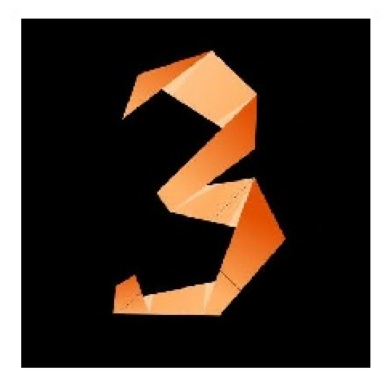

In [ ]:
image_bgr=cv2.imread('IMG-20240116-WA0004.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis('off') # Turn off Axis labels and ticks
plt.show()

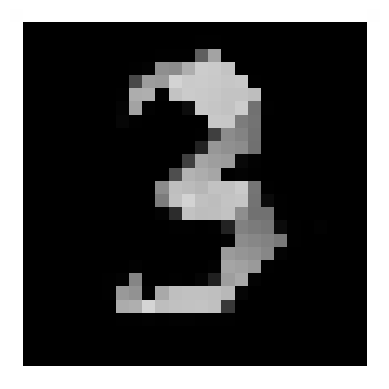

In [ ]:
image = cv2.imread('IMG-20240116-WA0004.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image,(28,28))
plt.imshow(image_resized, cmap='gray'), plt.axis('off')
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('prediction Score: ', prediction[0])
thressholded = (prediction>0.5)*1
print ('Thressholded score: ', thressholded[0])
print('predicted Digit: ', np.where(thressholded == 1)[1][0])

1/1 [==============================] - 0s 85ms/step
prediction Score:  [1.76100130e-03 4.72237803e-02 1.15001008e-01 6.76348329e-01
 3.12027958e-04 4.60834429e-02 2.29633297e-03 4.24591172e-03
 1.05219245e-01 1.31461734e-03 2.07120211e-05 2.55984814e-05
 3.78692457e-05 1.99484020e-05 2.67454870e-05 1.94436034e-05
 1.93985779e-05 2.46456311e-05]
Thressholded score:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
predicted Digit:  3
